In [25]:
#Import Dependencies
import json
import requests
from pprint import pprint
from config import api_key
import pandas as pd
import gmaps
import os
from pprint import pprint
import matplotlib.pyplot as plt

# Import API key
from config import gkey


In [14]:
#load in restaurant name api pull
id_df = pd.read_csv('restaurantIDs.csv')
id_df

,Business IDs
0,y6Y5M0sjwfPlDOOs4A_mcQ
1,pDr9PC7jD7LBnLgJxD_4wQ
2,VvYtvrRnKJ8UUvJbRHYV5Q
3,uqbIttno2vux1wW1mpyvgw
4,BMyK4sreXs6ER5k1WAosBQ
...,...
212,YeAoTh417Lbpx5MStmkt-Q
213,fNIpqMrqUg5Wr9-XYNDlVw
214,yyqZeTHfK513xOPLnof_6w
215,1I2f2tpE_clDXIKJEnZjFA


In [15]:
#loop through the businesses and load relevant data into the dataframe
names = list()
coordinates_lat = list()
coordinates_long = list()
indices = list()
categories = list()
review_count = list()
rating = list()
transaction = list()
headers = {'Authorization': 'bearer %s' % api_key}


for idx, row in id_df.iterrows():
    bus_ids = row['Business IDs']
    url = f'https://api.yelp.com/v3/businesses/{bus_ids}'
    resp = requests.get(url,headers=headers).json()
    indices.append(idx)
    names.append(resp['name'])
    coordinates_lat.append(resp['coordinates']['latitude'])
    coordinates_long.append(resp['coordinates']['longitude'])
    categories.append(resp['categories'][0]['alias'])
    review_count.append(resp['review_count'])
    rating.append(resp['rating'])
    print(idx)
    try:
        transaction.append(resp['transactions'])
        business_df = pd.DataFrame({
        'index':indices,
        'name':names,
        'coordinates_lat': coordinates_lat,
        'coordinates_long': coordinates_long,
        'categories':categories,
        'review_count':review_count,
        'rating':rating,
        'Services':transaction       
})
    except(KeyError):
        print("error,skipping")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


In [16]:
business_df

,index,name,coordinates_lat,coordinates_long,categories,review_count,rating,Services
0,0,bb.q Chicken - Vernon Hills,42.240060,-87.941100,chickenshop,20,4.5,"[pickup, delivery]"
1,1,Bonta,42.199130,-87.933020,cafes,499,4.5,"[delivery, pickup]"
2,2,Ramen House Shinchan,42.238635,-87.941136,ramen,73,4.0,"[pickup, delivery]"
3,3,Lazy Dog Restaurant & Bar,42.244520,-87.945130,burgers,727,4.0,"[pickup, delivery]"
4,4,Zocalo Mexican Bar and Grill,42.230035,-87.976905,mexican,213,4.5,"[delivery, pickup]"
...,...,...,...,...,...,...,...,...
212,212,ALDI,42.252458,-88.019747,grocery,8,3.5,[]
213,213,Jani's Newstand,42.243160,-87.954115,convenience,3,1.5,[]
214,214,Starbucks,42.255691,-87.948152,coffee,25,2.0,[delivery]
215,215,Dunkin',42.197669,-88.019592,donuts,9,2.5,[delivery]


In [17]:
# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = business_df[['coordinates_lat', 'coordinates_long']]

# Fill NaN values and convert to float
reviews = business_df['rating'].astype(float)

In [18]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=reviews, 
                                 dissipating=False, max_intensity=5,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#add the business name marks to the heatmap 
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
</dl>
"""
# Store the DataFrame Row
bus_info = [info_box_template.format(**row) for index, row in business_df.iterrows()]
locations = business_df[["coordinates_lat", "coordinates_long"]]


In [11]:
# Add marker layer ontop of heat map
marker_layer = gmaps.marker_layer(locations, info_box_content=bus_info)



# Display figure with heat map on rating with lat/lng and clickable pins for businesses
fig = gmaps.figure()
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#save output
business_df.to_csv('restaurant_detailed.csv', index = False)

In [21]:
#define data for ploting
services_count = business_df['Services'].value_counts().copy
rating_count = business_df['rating'].value_counts()
rating_total = business_df['rating'].sum()
avg_review_count = business_df['review_count'].mean()

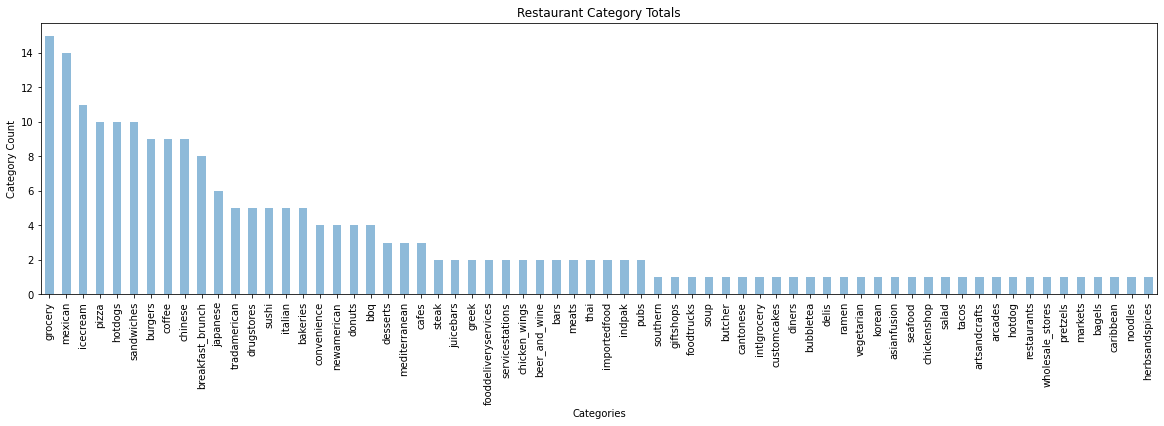

In [26]:
#plot bar graph
category_count = business_df['categories'].value_counts()
category_count
categories_bar= pd.DataFrame(category_count)
categories_bar.plot.bar(legend=False, alpha=0.5, align="center", figsize=(20,5))
plt.title('Restaurant Category Totals')
plt.xlabel('Categories')
plt.ylabel('Category Count')
plt.show()

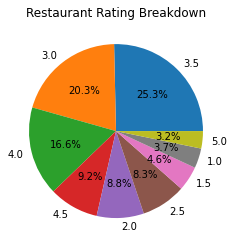

In [27]:
#plotting pie chart data
ratings_pie =pd.DataFrame(rating_count)
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%')
plt.title('Restaurant Rating Breakdown')
plt.show()